In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from keras import utils as np_utils 

In [2]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
num_classes = 10  # Number of class for the dataset

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [5]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


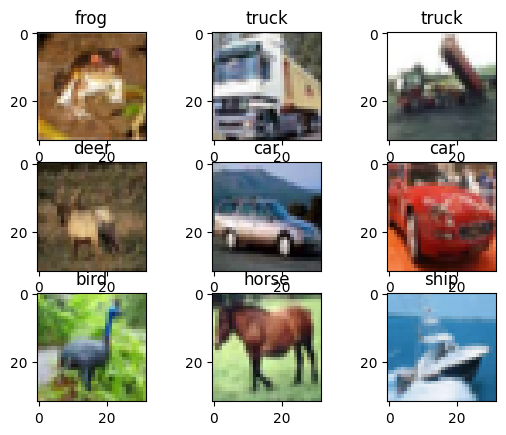

In [6]:
for i in range(9):
    plt.subplot(330 + 1+ i)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])
plt.show()

In [7]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [13]:

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                      

In [14]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [15]:
model_history = model.fit(x_train,y_train,epochs=5, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 309s 197ms/step - loss: 1.6753 - accuracy: 0.3879 - val_loss: 1.3607 - val_accuracy: 0.5061
Epoch 2/5
1563/1563 [==============================] - 292s 187ms/step - loss: 1.3159 - accuracy: 0.5311 - val_loss: 1.2047 - val_accuracy: 0.5686
Epoch 3/5
1563/1563 [==============================] - 293s 187ms/step - loss: 1.1455 - accuracy: 0.5968 - val_loss: 1.0120 - val_accuracy: 0.6403
Epoch 4/5
1563/1563 [==============================] - 292s 187ms/step - loss: 1.0285 - accuracy: 0.6399 - val_loss: 0.9359 - val_accuracy: 0.6726
Epoch 5/5
1563/1563 [==============================] - 292s 187ms/step - loss: 0.9458 - accuracy: 0.6691 - val_loss: 0.8602 - val_accuracy: 0.7043


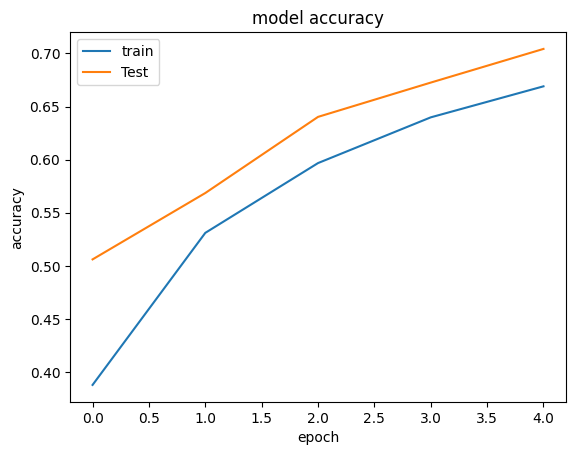

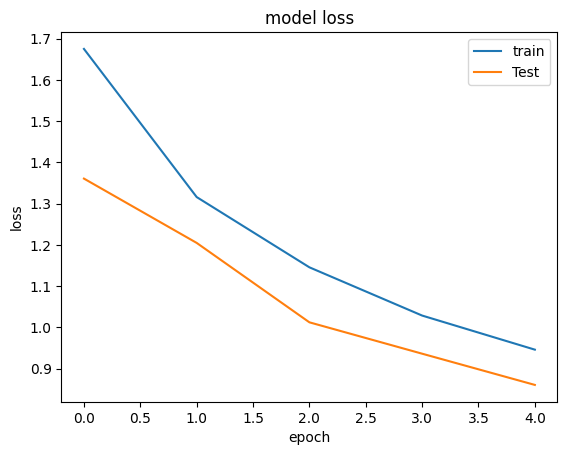

In [17]:

plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])

plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","Test"])
plt.show()

plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])

plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","Test"])
plt.show()

In [18]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 14s 45ms/step - loss: 0.8602 - accuracy: 0.7043
Test loss: 0.8601928949356079
Test accuracy: 0.7042999863624573
313/313 [==============================] - 13s 42ms/step


In [22]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]


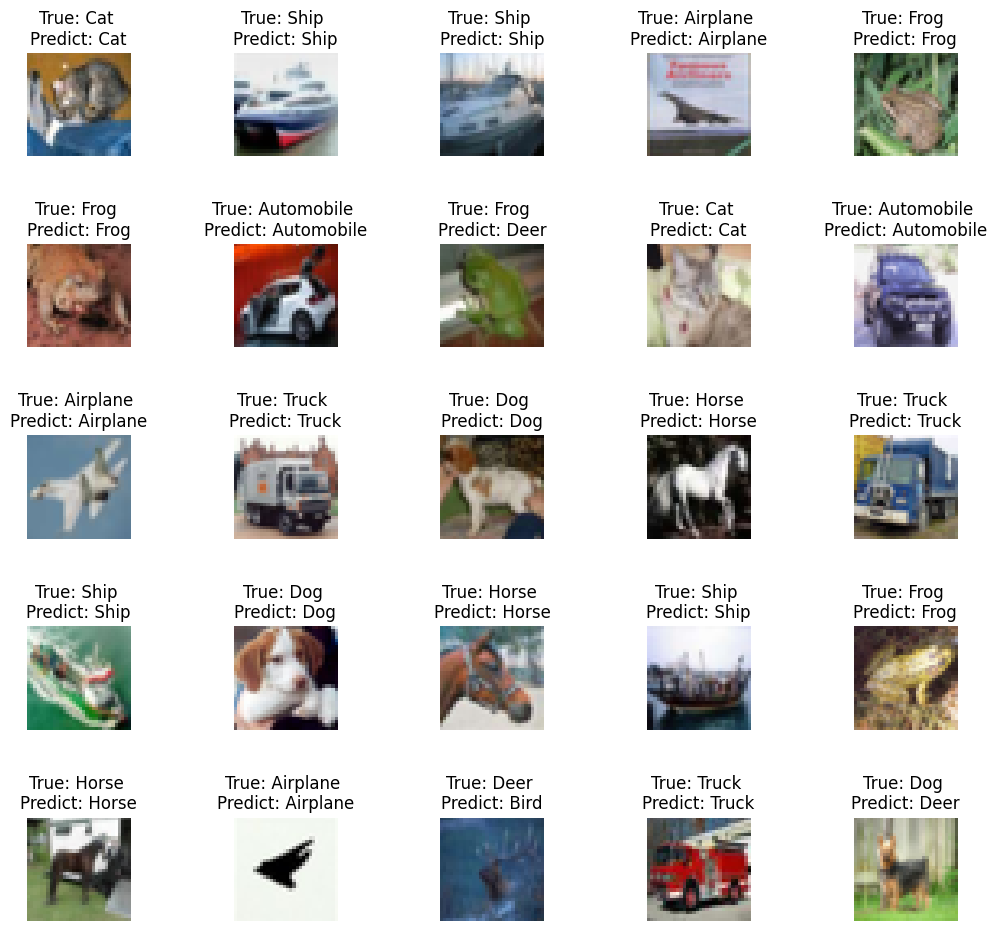

In [23]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)